In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from src.classes.ClassFractionalBiPotential import FractionalBiPotential
import numpy as np
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_WRMSE import get_config

In [2]:
config = get_config()
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
data_path = root_dir + "Datasets/"
use_original_training_data = True

In [16]:
if use_original_training_data:
    training_data = np.load(data_path + (config.data_path).split("/")[-1], allow_pickle=True)[:1000, :]
else:
    pass
initStates = np.repeat(np.array(config.initState)[np.newaxis],training_data.shape[0], axis=0)[:, np.newaxis]
training_data = np.concatenate([initStates, training_data], axis=1)[:, :, np.newaxis]
print(training_data.shape)

(1000, 257, 1)


## Plot histograms for each dimension for the training data

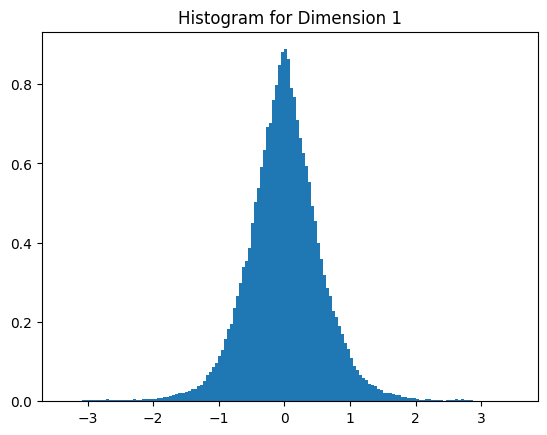

In [17]:
for dim in range(0,training_data.shape[-1], 4):
    plt.hist(training_data[:, 1:, dim].flatten(), density=True, bins=150)
    plt.title(f"Histogram for Dimension {dim+1}")
    plt.show()
    plt.close()

## Plot the trajectories along the contours for each dimension

In [18]:
# Define the potential for 2D
def plot_trajectories(t1, ts_length, training_data):
    time_ax = np.linspace(0, t1, ts_length+1)
    # Choose dimension to plot (for example dimension 0)
    for dim in range(0,training_data.shape[-1], 4):

        fig, ax = plt.subplots(figsize=(10, 6))
        for i in range(0,training_data.shape[0]):
            plt.plot(time_ax, training_data[i, :, dim])
        ax.set_xlabel("Time")
        ax.set_ylabel(f"Position $x_{dim+1}$")
        ax.set_title(f"Dimension {dim+1}: Trajectories")
        plt.show()
        plt.close()


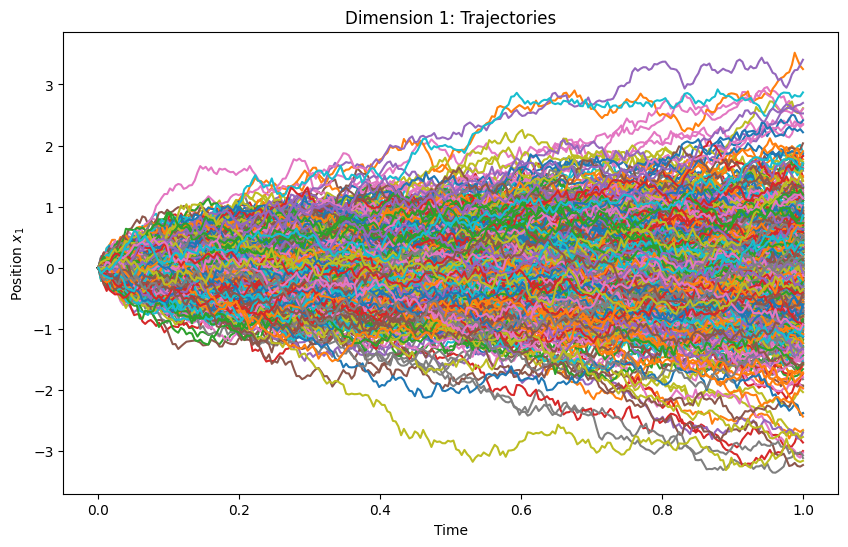

In [19]:
plot_trajectories(t1=config.t1, ts_length=config.ts_length, training_data=training_data)

### Now plot the trajectories for the Nadaraya based True vs Estimated paths

In [23]:
num_paths = 10240
if config.ndims == 12:
    best_bw_idx = 39
else:
    best_bw_idx = 0
def get_nadaraya_drift_files(config, root_dir, best_bw_idx, num_paths):
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/SinLog/"
    true_files = []
    local_files = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and include in file :
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "local" in file:
                local_files.append(root_nadaraya_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    true_file = np.load(true_files[best_bw_idx])[[0],:,:,:]
    true_file = true_file.reshape(true_file.shape[0]*true_file.shape[1], true_file.shape[2], true_file.shape[-1])
    local_file = np.load(local_files[best_bw_idx])[[0],:,:,:]
    local_file = local_file.reshape(local_file.shape[0]*local_file.shape[1], local_file.shape[2], local_file.shape[-1])
    bw = bws[best_bw_idx]
    return true_file, local_file, bw
true_nd0, local_nd, bw = get_nadaraya_drift_files(config=config,root_dir=root_dir,  best_bw_idx=best_bw_idx, num_paths=num_paths)
print(true_nd.shape, local_nd.shape)

NameError: name 'true_nd' is not defined

In [24]:
true_nd1-true_nd0

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]])

In [ ]:
plot_trajectories(t1=config.t1, ts_length=config.ts_length, training_data=true_nd)

In [ ]:
plot_trajectories(t1=config.t1, ts_length=config.ts_length, training_data=local_nd)

### Now plot the trajectories for the score based True vs Estimated paths


In [ ]:
if config.ndims == 12:
    Nepoch = 290
elif config.ndims == 8:
    Nepoch =
def get_score_drift_files(config, root_dir, Nepoch):
    ts_type = f"ST_{config.feat_thresh:.3f}FTh_f{config.ndims}DLnz".replace(".", "")
    root_score_dir = root_dir + f"ExperimentResults/TSPM_Markovian/{config.ndims}DLnz/"
    driftoostrack_true_files = []
    driftoostrack_local_files = []
    for file in os.listdir(root_score_dir):
        if "_MLP_" in file and ts_type in file:
            if "DriftTrack" in file and "true" in file:
                driftoostrack_true_files.append(root_score_dir+file)
            elif "DriftTrack" in file and "local" in file:
                driftoostrack_local_files.append(root_score_dir+file)
    assert len(driftoostrack_true_files)>0, "No oos drift track files found"
    assert len(driftoostrack_local_files)>0, "No oos drift track files found"
    assert(len(driftoostrack_true_files) == len(driftoostrack_true_files))
    def extract_bw_drift_track_number(s):
        match = s.split("Nep_")[0].split("_")[-1]
        return int(match)
    driftoostrack_true_files = sorted(driftoostrack_true_files, key=extract_bw_drift_track_number)
    driftoostrack_local_files = sorted(driftoostrack_local_files, key=extract_bw_drift_track_number)
    Nepochs_track = [extract_bw_drift_track_number(f) for f in driftoostrack_true_files]
    Nepoch_idx = np.argwhere(np.array(Nepochs_track) == Nepoch)[0,0]
    true_score_paths = np.load(driftoostrack_true_files[Nepoch_idx], allow_pickle=True)
    true_score_paths = true_score_paths.reshape(true_score_paths.shape[0]*true_score_paths.shape[1], true_score_paths.shape[2], true_score_paths.shape[-1])
    local_score_paths = np.load(driftoostrack_local_files[Nepoch_idx], allow_pickle=True)
    local_score_paths = local_score_paths.reshape(local_score_paths.shape[0]*local_score_paths.shape[1], local_score_paths.shape[2], local_score_paths.shape[-1])
    return true_score_paths, local_score_paths

true_score_paths, local_score_paths = get_score_drift_files(config=config, root_dir=root_dir, Nepoch=Nepoch)

In [ ]:
plot_trajectories(t1=config.t1, ts_length=config.ts_length, training_data=true_score_paths)

In [ ]:
plot_trajectories(t1=config.t1, ts_length=config.ts_length, training_data=local_score_paths)